In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

# Clases y demás

## Encontrar las veces que se repite un personaje

### Una clase para ver cuántas líneas de diálogo tienen los 10 personajes más repetidos

In [4]:
class ContadorPersonajesRepetidos:
    def __init__(self, dataset_path):
        self.dataset = pd.read_csv(dataset_path)

    def contar_personajes_repetidos(self, num_personajes=10):
        # Contar la frecuencia de los personajes
        frecuencia_personajes = self.dataset['character'].value_counts()

        # Seleccionar los quince personajes más repetidos
        quince_personajes_mas_repetidos = frecuencia_personajes.head(num_personajes)

        # Crear un nuevo DataFrame con los quince personajes y sus repeticiones
        personajes_repetidos_15 = pd.DataFrame({'Personaje': quince_personajes_mas_repetidos.index, 'Repeticiones': quince_personajes_mas_repetidos.values})

        return personajes_repetidos_15

### Una clase para ver las veces que esos personajes son mencionados en los diálogos

In [5]:
class ContadorNombresEnDialogo:
    def __init__(self, dataset_path, palabras_a_buscar):
        self.dataset = pd.read_csv(dataset_path)
        self.palabras_a_buscar = [palabra.lower() for palabra in palabras_a_buscar]

    def contar_repeticiones(self):
        # Convertir el contenido de la columna "dialog" a minúsculas
        self.dataset['dialog'] = self.dataset['dialog'].str.lower()

        # Inicializar un diccionario para almacenar las repeticiones de cada palabra
        repeticiones = {palabra.capitalize(): [] for palabra in self.palabras_a_buscar}

        # Contar la frecuencia de cada palabra en todas las líneas de diálogo
        for palabra in self.palabras_a_buscar:
            repeticiones[palabra.capitalize()] = [len(re.findall(rf'\b{re.escape(palabra)}\b', dialog)) for dialog in self.dataset['dialog']]

        # Crear un DataFrame con los resultados
        resultado_df = pd.DataFrame({'Palabra': [palabra.capitalize() for palabra in self.palabras_a_buscar], 'Repeticiones': [sum(repeticiones[palabra.capitalize()]) for palabra in self.palabras_a_buscar]})
        
        # Calcular el sumatorio de repeticiones
        sumatorio_repeticiones = resultado_df['Repeticiones'].sum()

        # Agregar el sumatorio al DataFrame de resultados
        resultado_df = pd.concat([resultado_df, pd.DataFrame({'Palabra': ['Sumatorio'], 'Repeticiones': [sumatorio_repeticiones]})], ignore_index=True)

        return resultado_df

## Personajes más relevantes

In [6]:
if __name__ == "__main__":
    contador = ContadorPersonajesRepetidos('csv/4_Harry_Potter_and_the_Gobelt_of_Fire.csv')
    resultados_personajes = contador.contar_personajes_repetidos()

resultados_personajes

,Personaje,Repeticiones
0,Harry Potter,161
1,Ron Weasley,76
2,Albus Dumbledore,71
3,Hermione Granger,63
4,Alastor Moody,55
5,Bartemius Crouch,26
6,Voldemort,22
7,Cedric Diggory,22
8,Minerva McGonagall,21
9,Arthur Weasley,19


### Formas de referirse a los personajes más relevantes

In [7]:
palabras_a_buscar_harry = ["harry potter", "harry", "the boy who lived", "the chosen one", "potter", "mr. potter", "the gryffindor seeker", "harry james potter"]
palabras_a_buscar_dumbledore = ["albus percival wulfric brian dumbledore", "professor dumbledore", "dumbledore", "albus dumbledore", "headmaster", "chief warlock of the wizengamot", "the old professor", "the wise one", "albus", "the headmaster of hogwarts"]
palabras_a_buscar_ron = ["ron", "ron weasley", "ronald", "ronald weasley", "the ginger", "ronniekins", "ginger nut", "the weasley boy", "won-won"]
palabras_a_buscar_hermione = ["hermione granger", "hermione", "granger", "miss granger", "hermione jean granger", "the brightest witch of her age", "the smart one"]
palabras_a_buscar_moody = ["Alastor Moody","Mad-Eye Moody","Moody","Alastor","The Eye","Mad-Eye"]
palabras_a_buscar_crouch = ["Bartemius Crouch","Bartemius Crouch Sr.","Mr. Crouch","Barty Crouch","Crouch Sr.","Crouch","The Head of Department of International Magical Cooperation"]
palabras_a_buscar_tom = ["Tom Marvolo Riddle","Tom Riddle","Voldemort","Lord Voldemort","The Dark Lord","Riddle","The Heir of Slytherin","The Young Dark Wizard","The Memory"]
palabras_a_buscar_cedric = ["Cedric Diggory","Cedric","Mr. Diggory","The Hufflepuff Seeker","The Hufflepuff Prefect"]
palabras_a_buscar_mcgonagall = ["professor mcgonagall", "mcgonagall", "minerva", "minerva mcgonagall", "deputy headmistress", "transfiguration professor", "mcg", "head of gryffindor"]
palabras_a_buscar_arthur = ["Arthur Weasley","Mr. Weasley","Arthur","Weasley","The Muggle Enthusiast","Father of Ron","Husband of Molly","The Weasley Patriarch"]

#### Harry Potter - 125 veces

In [8]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_harry
    contador = ContadorNombresEnDialogo('csv/4_Harry_Potter_and_the_Gobelt_of_Fire.csv', palabras_a_buscar)
    resultados_harry = contador.contar_repeticiones()

resultados_harry

,Palabra,Repeticiones
0,Harry potter,11
1,Harry,80
2,The boy who lived,1
3,The chosen one,0
4,Potter,33
5,Mr. potter,0
6,The gryffindor seeker,0
7,Harry james potter,0
8,Sumatorio,125


#### Dumbledore - 15 veces

In [9]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_dumbledore
    contador = ContadorNombresEnDialogo('csv/4_Harry_Potter_and_the_Gobelt_of_Fire.csv', palabras_a_buscar)
    resultados_dumbledore = contador.contar_repeticiones()

resultados_dumbledore

,Palabra,Repeticiones
0,Albus percival wulfric brian dumbledore,0
1,Professor dumbledore,1
2,Dumbledore,9
3,Albus dumbledore,1
4,Headmaster,0
5,Chief warlock of the wizengamot,0
6,The old professor,0
7,The wise one,0
8,Albus,4
9,The headmaster of hogwarts,0


#### Ron - 18 veces

In [10]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_ron
    contador = ContadorNombresEnDialogo('csv/4_Harry_Potter_and_the_Gobelt_of_Fire.csv', palabras_a_buscar)
    resultados_ron = contador.contar_repeticiones()

resultados_ron

,Palabra,Repeticiones
0,Ron,14
1,Ron weasley,1
2,Ronald,3
3,Ronald weasley,0
4,The ginger,0
5,Ronniekins,0
6,Ginger nut,0
7,The weasley boy,0
8,Won-won,0
9,Sumatorio,18


#### Hermione - 20 veces

In [11]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_hermione
    contador = ContadorNombresEnDialogo('csv/4_Harry_Potter_and_the_Gobelt_of_Fire.csv', palabras_a_buscar)
    resultados_hermione = contador.contar_repeticiones()

resultados_hermione

,Palabra,Repeticiones
0,Hermione granger,1
1,Hermione,10
2,Granger,6
3,Miss granger,3
4,Hermione jean granger,0
5,The brightest witch of her age,0
6,The smart one,0
7,Sumatorio,20


#### Moody - 20 veces

In [12]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_moody
    contador = ContadorNombresEnDialogo('csv/4_Harry_Potter_and_the_Gobelt_of_Fire.csv', palabras_a_buscar)
    resultados_moody = contador.contar_repeticiones()

resultados_moody

,Palabra,Repeticiones
0,Alastor moody,3
1,Mad-eye moody,1
2,Moody,8
3,Alastor,6
4,The eye,0
5,Mad-eye,2
6,Sumatorio,20


#### Crouch - 10 veces

In [13]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_crouch
    contador = ContadorNombresEnDialogo('csv/4_Harry_Potter_and_the_Gobelt_of_Fire.csv', palabras_a_buscar)
    resultados_crouch = contador.contar_repeticiones()

resultados_crouch

,Palabra,Repeticiones
0,Bartemius crouch,0
1,Bartemius crouch sr.,0
2,Mr. crouch,0
3,Barty crouch,3
4,Crouch sr.,0
5,Crouch,7
6,The head of department of international magica...,0
7,Sumatorio,10


#### Tom/Voldy - 18 veces

In [14]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_tom
    contador = ContadorNombresEnDialogo('csv/4_Harry_Potter_and_the_Gobelt_of_Fire.csv', palabras_a_buscar)
    resultados_tom = contador.contar_repeticiones()

resultados_tom

,Palabra,Repeticiones
0,Tom marvolo riddle,0
1,Tom riddle,0
2,Voldemort,9
3,Lord voldemort,4
4,The dark lord,4
5,Riddle,1
6,The heir of slytherin,0
7,The young dark wizard,0
8,The memory,0
9,Sumatorio,18


#### Cedric - 20 veces

In [15]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_cedric
    contador = ContadorNombresEnDialogo('csv/4_Harry_Potter_and_the_Gobelt_of_Fire.csv', palabras_a_buscar)
    resultados_cedric = contador.contar_repeticiones()

resultados_cedric

,Palabra,Repeticiones
0,Cedric diggory,5
1,Cedric,15
2,Mr. diggory,0
3,The hufflepuff seeker,0
4,The hufflepuff prefect,0
5,Sumatorio,20


#### McGonagall - 3 veces

In [16]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_mcgonagall
    contador = ContadorNombresEnDialogo('csv/4_Harry_Potter_and_the_Gobelt_of_Fire.csv', palabras_a_buscar)
    resultados_mcgonagall = contador.contar_repeticiones()

resultados_mcgonagall

,Palabra,Repeticiones
0,Professor mcgonagall,1
1,Mcgonagall,1
2,Minerva,1
3,Minerva mcgonagall,0
4,Deputy headmistress,0
5,Transfiguration professor,0
6,Mcg,0
7,Head of gryffindor,0
8,Sumatorio,3


#### Arthur - 3 veces

In [17]:

if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_arthur
    contador = ContadorNombresEnDialogo('csv/4_Harry_Potter_and_the_Gobelt_of_Fire.csv', palabras_a_buscar)
    resultados_arthur = contador.contar_repeticiones()

resultados_arthur

,Palabra,Repeticiones
0,Arthur weasley,0
1,Mr. weasley,0
2,Arthur,1
3,Weasley,2
4,The muggle enthusiast,0
5,Father of ron,0
6,Husband of molly,0
7,The weasley patriarch,0
8,Sumatorio,3


### Continuación

#### Añadimos los resultados al dataframe original

In [18]:
resultados = [125, 15, 18, 20, 20, 10, 18, 20, 3, 3]

Añadimos columna

In [19]:
resultados_personajes['Menciones'] = resultados
resultados_personajes

,Personaje,Repeticiones,Menciones
0,Harry Potter,161,125
1,Ron Weasley,76,15
2,Albus Dumbledore,71,18
3,Hermione Granger,63,20
4,Alastor Moody,55,20
5,Bartemius Crouch,26,10
6,Voldemort,22,18
7,Cedric Diggory,22,20
8,Minerva McGonagall,21,3
9,Arthur Weasley,19,3


Sumamos las columnas

In [20]:
resultados_personajes['Total'] = resultados_personajes['Repeticiones'] + resultados_personajes['Menciones']
resultados_personajes

,Personaje,Repeticiones,Menciones,Total
0,Harry Potter,161,125,286
1,Ron Weasley,76,15,91
2,Albus Dumbledore,71,18,89
3,Hermione Granger,63,20,83
4,Alastor Moody,55,20,75
5,Bartemius Crouch,26,10,36
6,Voldemort,22,18,40
7,Cedric Diggory,22,20,42
8,Minerva McGonagall,21,3,24
9,Arthur Weasley,19,3,22


Re-ordenamos las columnas

In [21]:
resultados_personajes = resultados_personajes.sort_values(by='Total', ascending=False)
resultados_personajes = resultados_personajes.reset_index(drop=True)
resultados_personajes # podemos observar cambios en el orden

,Personaje,Repeticiones,Menciones,Total
0,Harry Potter,161,125,286
1,Ron Weasley,76,15,91
2,Albus Dumbledore,71,18,89
3,Hermione Granger,63,20,83
4,Alastor Moody,55,20,75
5,Cedric Diggory,22,20,42
6,Voldemort,22,18,40
7,Bartemius Crouch,26,10,36
8,Minerva McGonagall,21,3,24
9,Arthur Weasley,19,3,22


Filtramos solo por el total

In [22]:
resultados_personajes = resultados_personajes[['Personaje', 'Total']]
resultados_personajes

,Personaje,Total
0,Harry Potter,286
1,Ron Weasley,91
2,Albus Dumbledore,89
3,Hermione Granger,83
4,Alastor Moody,75
5,Cedric Diggory,42
6,Voldemort,40
7,Bartemius Crouch,36
8,Minerva McGonagall,24
9,Arthur Weasley,22


Vamos a hacer una gráfica

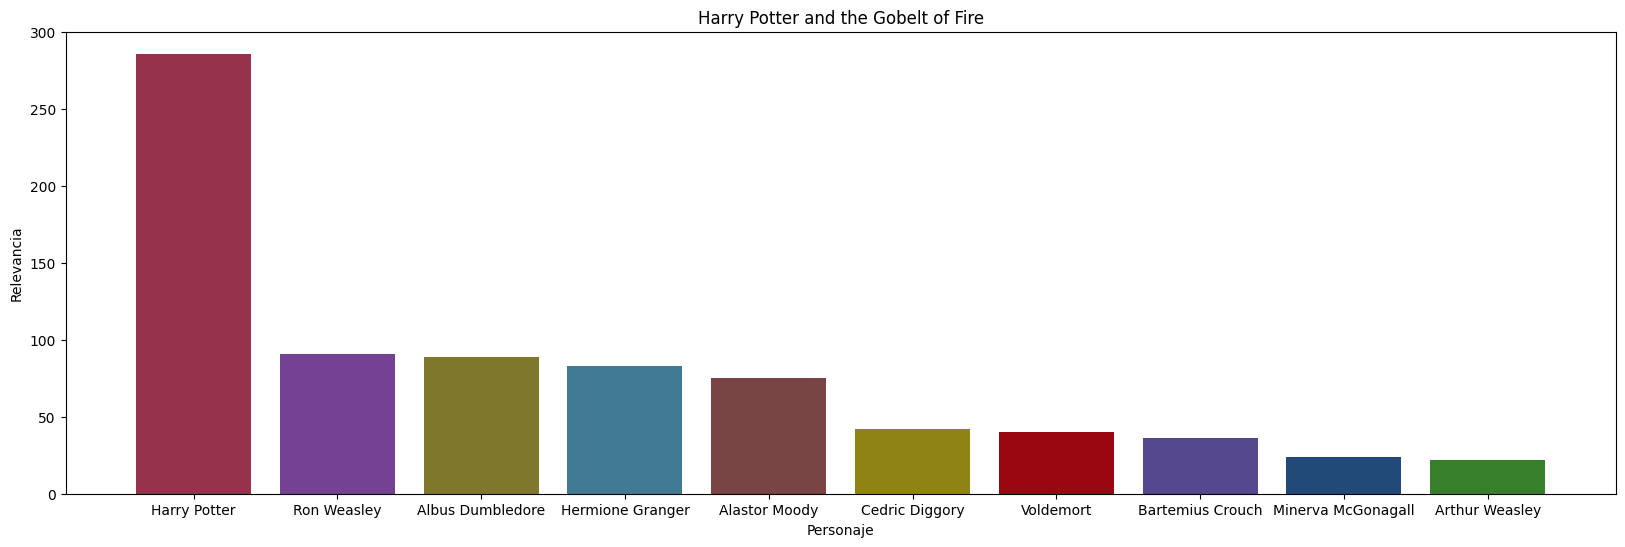

In [23]:
personajes = resultados_personajes['Personaje']
total = resultados_personajes['Total']

colores = ['#7F2C40', '#744193', '#7F772C', '#417B93', '#794444', '#8F8314', '#990811', '#56488E', '#224A79', '#387F2C']

plt.figure(figsize=(20, 6))
plt.bar(personajes, total, color=colores)


plt.xlabel('Personaje')
plt.ylabel('Relevancia')
plt.title("Harry Potter and the Gobelt of Fire")

plt.show()

Sacamos cvs para no perder los datos

In [24]:
resultados_personajes.to_csv('csv/Personajes_relevantes/HP_4.csv', index=False)
